In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '../organized_res/table_for_analysis.csv'
data = pd.read_csv(file_path)

data.head()

,Node Embedding,Predictor,Edge Sampling,PCA,AUROC,AUPRC
0,node2vec,lr,random_under,PCA Applied,0.727279,0.539625
1,node2vec,lr,random_under,PCA Not Applied,0.753072,0.560740
2,node2vec,lr,distance_under,PCA Applied,0.821724,0.791603
3,node2vec,lr,distance_under,PCA Not Applied,0.841164,0.817558
4,node2vec,softmax,random_under,PCA Not Applied,0.640371,0.514675


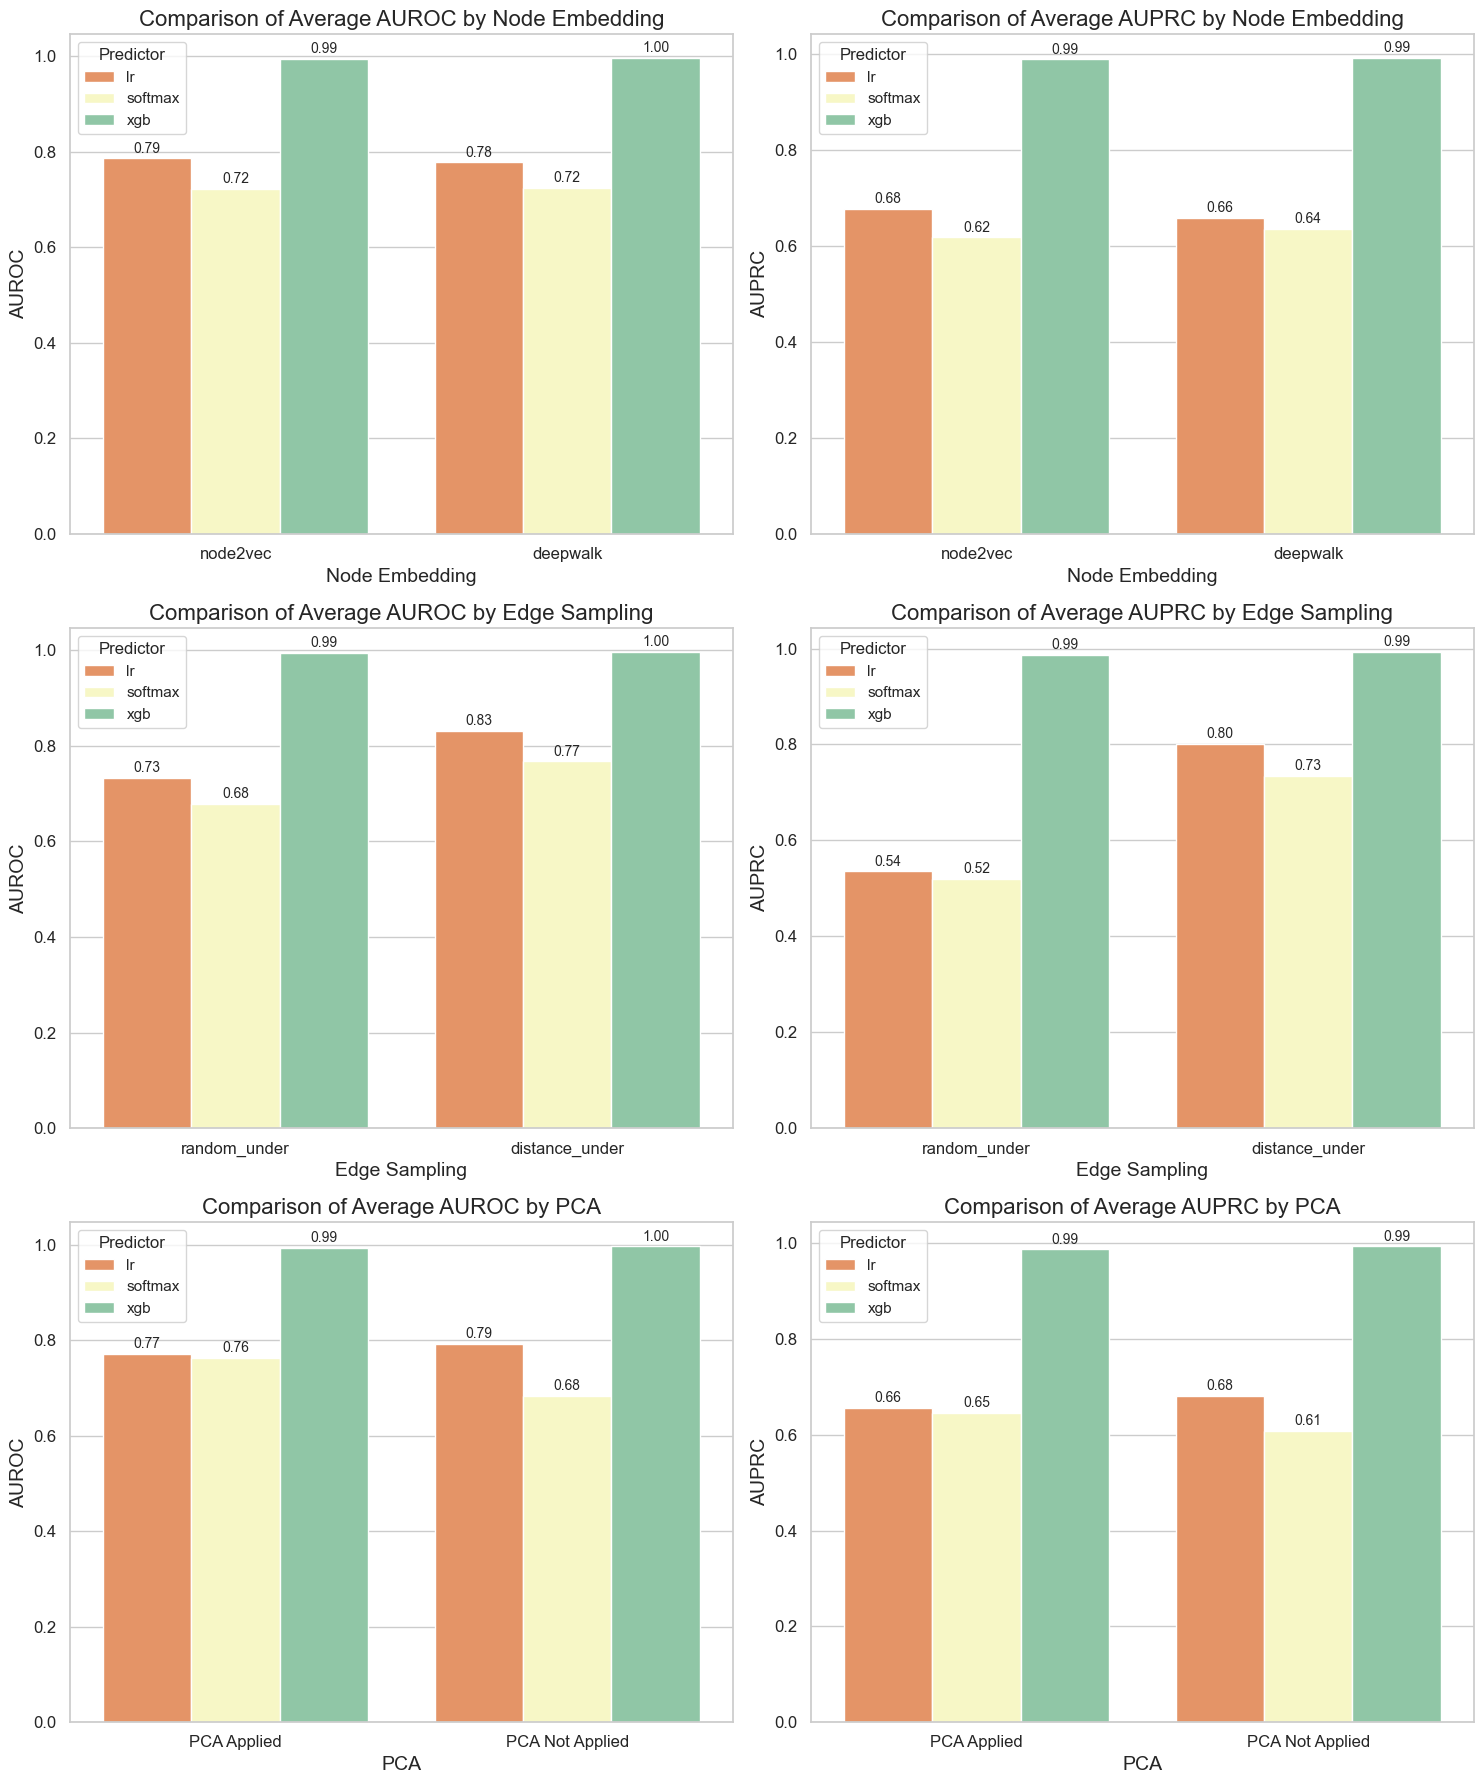

In [57]:
sns.set(style="whitegrid")

def create_comparison_plot(data, category, metric, ax):
    # create a barplot
    # change "hue" to see different comparison
    barplot = sns.barplot(x=category, y=metric, hue='Predictor', data=data, palette='Spectral', ax=ax, errorbar=None)

    # set plot title and labels
    ax.set_title(f'Comparison of Average {metric.upper()} by {category}', fontsize=16)
    ax.set_ylabel(metric.upper(), fontsize=14)
    ax.set_xlabel(category, fontsize=14)
    ax.tick_params(labelsize=12)

    # annotate each bar
    for p in barplot.patches:
        if p.get_height() > 0.01:
            barplot.annotate(format(p.get_height(), '.2f'),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center',
                             xytext=(0, 7), textcoords='offset points',fontsize=10)


categories = ['Node Embedding', 'Edge Sampling', 'PCA']
metrics = ['AUROC', 'AUPRC']

fig, axes = plt.subplots(3, 2, figsize=(15, 18))

for i, category in enumerate(categories):
    for j, metric in enumerate(metrics):
        create_comparison_plot(data, category, metric, axes[i][j])

plt.tight_layout()

handles, labels = axes[0][0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right', title='Predictor')


#save
plt.savefig('../res/plot/comparison.png')
plt.show()